**Stat 542 - Statistical Learning**

**Fall 2022**

**Coding Assignment #1**

**Author: Paolo Furlanetto Ferrari**

**Date: September 12, 2022**

In [264]:
import numpy as np
from collections import Counter 
from sklearn.neighbors import KNeighborsClassifier as sk_knn
import pandas as pd
import matplotlib 
import matplotlib.pyplot as plt


## Generate data

In [265]:
np.random.seed(3213)
sim_params = {
 'csize': 10,      # number of centers
 'p': 2,           # dimension
 's': np.sqrt(1/5),   # standard deviation for generating data
 'n': 100,         # training size per class
 'N': 5000,        # test size per class
}

# Generate center positions and add to sim_params
sigma = 1
csize = 10
p = 2
m1 = np.random.normal(size=(csize,p))*sigma + np.concatenate([np.array([[1,0]]*csize)])
m0 = np.random.normal(size=(csize,p))*sigma + np.concatenate([np.array([[0,1]]*csize)])
sim_params['m0'] = m0
sim_params['m1'] = m1


def generate_data(sim_params):
    csize, p, s, n, N, m0, m1 = sim_params.values()
    
    # Define vector with center indices sampled randomly
    id1 = np.random.randint(csize,size=n)
    id0 = np.random.randint(csize,size=n)

    
    # Generate X and Y training data
    X_train = np.random.normal(size = (2 * n, p)) * s \
                + np.concatenate([m1[id1,:], m0[id0,:]])
    Y_train = np.concatenate(([1]*n, [0]*n))
    
    # Define vector with center indices sampled randomly
    id1 = np.random.randint(csize, size = N)
    id0 = np.random.randint(csize, size = N)
    
    X_test = np.random.normal(size = (2 * N, p)) * s \
                + np.concatenate([m1[id1,:], m0[id0,:]])
    Y_test = np.concatenate(([1]*N, [0]*N))
    
    return X_train, Y_train, X_test, Y_test


X_train, Y_train, X_test, Y_test = generate_data(sim_params)


# Part I

## 1. Write your own KNN function without using any packages (use Euclidean Distance)

First, I will define a function **point_knn** that predicts the class (or color) of a point based on majority voting of its k-closest neighbors. 

Second, I will defined another function **knn** that iteratively calls **point_knn** to compute a vector Y_pred predicting the class of each point in input vector X_pred.

In [266]:
def point_knn(X_train, Y_train, point, k):
    
    # Compute distances between the given point and all the points in the training set:
    distances_squared = [] 
    for i in range(len(X_train)):
        distances_squared.append((X_train[i][0]-point[0])**2+(X_train[i][1]-point[1])**2)
    
    # Sort the distances in ascending order:
    args = np.argsort(distances_squared)
    int_args = [int(a) for a in args]
    
    # Get the colors of the k closest neighbors:
    k_colors = [Y_train[int_args[i]] for i in range(0,k)]
    
    # Choose the most common color among these k neighbors:
    color, votes = Counter(k_colors).most_common()[0]
    
    return color

def knn(X_data = X_train, Y_data = Y_train, X_pred = X_test, k = 1):
    
    # Apply point_knn to all the points in X_pred and return Y_pred
    Y_pred = []
    for point in X_pred:
        Y_pred.append(point_knn(X_data, Y_data, point, k))
    return Y_pred


## 2. Explain how you handle distance ties and voting ties

1 - For distance ties: 

I am ordering the vector of distances and taking the first k entries. Since each distance is computed as a floating point, having two distances with exactly the same distance is very rare. However, when this happens, as long as both distances are in the first k entries of the ordered vector of distances, both points are considered for voting. If two points with equal distances are competing for last entry of the vector of distances, only the point generated first in the training data is included among the k nearest neighbors. 

2 - For voting ties: 

The method which I am using is the Counter.most_common() method. It picks the most common element in a list. If there is a tie between two classes in a list, the first class appearing half the times is considered the winner. 

## 3. Test the code:

**------------------------------------ Testing k=1 -------------------------------------------**

In [267]:
my_test = knn(X_train, Y_train, X_test, 1)
sk_kNN = sk_knn(n_neighbors=1)
sk_kNN.fit(X_train, Y_train)
sk_test = sk_kNN.predict(X_test)

**Confusion matrix**

In [268]:
print('My knn:')
print(pd.crosstab(my_test, Y_test))

print('Sci-kit learn knn:')
print(pd.crosstab(sk_test, Y_test))


My knn:
col_0     0     1
row_0            
0      4070   808
1       930  4192
Sci-kit learn knn:
col_0     0     1
row_0            
0      4070   808
1       930  4192


**Error rates**

In [269]:
print('My knn:')
print(np.mean(my_test != Y_test))

print('Scikit-learn knn:')
print(np.mean(sk_test != Y_test))


My knn:
0.1738
Scikit-learn knn:
0.1738


**Conclusion:** Both my code and scikit-learn's built-in function have an error rate of 17.4% for knn model with 1 neighbor only.

**------------------------------------ Testing k=3 -------------------------------------------**

In [270]:
my_test = knn(X_train, Y_train, X_test, 3)
sk_kNN = sk_knn(n_neighbors=3)
sk_kNN.fit(X_train, Y_train)
sk_test = sk_kNN.predict(X_test)


**Confusion matrix**

In [271]:
print('My knn:')
print(pd.crosstab(my_test, Y_test))

print('Scikit-learn knn:')
print(pd.crosstab(sk_test, Y_test))


My knn:
col_0     0     1
row_0            
0      4362   705
1       638  4295
Scikit-learn knn:
col_0     0     1
row_0            
0      4362   705
1       638  4295


**Error rates**

In [272]:
print('My knn:')
print(np.mean(my_test != Y_test))

print('Scikit-learn knn:')
print(np.mean(sk_test != Y_test))


My knn:
0.1343
Scikit-learn knn:
0.1343


**Conclusion:** Again, both methods agree. This time, the error rate is 13.4% for knn model with 3 neighbors,  smaller than 17.4% for 1 neighbor only.

**------------------------------------ Testing k=5 -------------------------------------------**

In [273]:
my_test = knn(X_train, Y_train, X_test, 5)
sk_kNN = sk_knn(n_neighbors=5)
sk_kNN.fit(X_train, Y_train)
sk_test = sk_kNN.predict(X_test)


**Confusion matrix**

In [274]:
print('My knn:')
print(pd.crosstab(my_test, Y_test))

print('Scikit-learn knn:')
print(pd.crosstab(sk_test, Y_test))


My knn:
col_0     0     1
row_0            
0      4497   744
1       503  4256
Scikit-learn knn:
col_0     0     1
row_0            
0      4497   744
1       503  4256


**Error rates**

In [275]:
print('My knn:')
print(np.mean(my_test != Y_test))

print('Scikit-learn knn:')
print(np.mean(sk_test != Y_test))


My knn:
0.1247
Scikit-learn knn:
0.1247


**Conclusion:** Again, both methods agree. The error rate is 12.5% for knn model with 5 neighbors, smaller than the two previous cases. This makes sense since using more neighbors better samples the underlying distributions and reduces the influence of votes from out-liers. 

# Part II: Cross-validation

## 1. Implement KNN classification with K chosen by 10-fold cross-validation

**Using scikit-learn**

In [276]:
def sk_error(traindata, Ytrain, num_folds, K):  
    n = len(Ytrain)
    fold_size = int(n / num_folds)
    indices = np.arange(n)
    np.random.shuffle(indices)
    index_sets = np.array_split(indices, num_folds)
    err = 0
    for ifold in range(num_folds):
        train_indices =  np.delete(index_sets, obj=ifold, axis=0).ravel()
        _traindata = traindata[train_indices]
        _Ytrain = Ytrain[train_indices]

        test_indices = index_sets[ifold]
        _testdata = traindata[test_indices]
        _Ytest = Ytrain[test_indices]
        
        neigh = sk_knn(n_neighbors=K)
        neigh.fit(_traindata, _Ytrain)
        
        predict_Y = neigh.predict(_testdata)
        
        err += sum(predict_Y != _Ytest)
    
    return err/(n)



def sk_cvKNN(traindata, Ytrain, num_folds):  
    n = len(Ytrain)
    fold_size = int(n / num_folds)
    k_vector = range(1, n - fold_size)
    k_cverr = [sk_error(traindata, Ytrain, num_folds, K) for K in k_vector]
    tmp = np.column_stack((k_vector, k_cverr))
    best_k = tmp[tmp[:,1] == np.min(tmp[:,1])][:,0]
    return [int(max(best_k)), k_vector, k_cverr]

## 2. Explain how you handle the non-uniquness of the optimal K values

I'm choosing the maximum value of the best candidates for k.

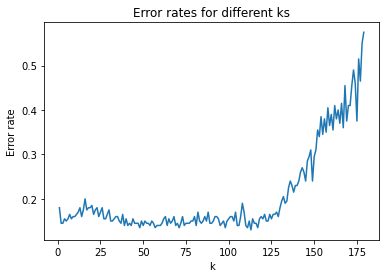

In [277]:
best_k, k_vector, k_cverr = sk_cvKNN(X_train, Y_train, 10)

p1 = plt.plot(k_vector, k_cverr)
plt.ylabel('Error rate')
plt.xlabel('k')
plt.title('Error rates for different ks')
plt.show()


**Optimal k from CV:**

In [278]:
print('Optimal k:',best_k)

Optimal k: 113


**Conclusion:** The model seems to perform better for k in the range of 1 to 130. For k > 130, the error rate start to increase dramatically since the number of neighbors is approaching the number of points in the training set.

# Part III: Bayes Rule

## 1. Implement the Bayes Rule


Code implementation:

In [279]:
x = [0, 0]
s = sim_params['s']

def BayesRule_point(x):
    d1 = sum(np.exp(- ((m1[i, 0] - x[0]) ** 2 + (m1[i, 1] - x[1]) ** 2) / (2 * s ** 2)) for i in range(len(m1)))

    d0 = sum(np.exp(- ((m0[i, 0] - x[0]) ** 2 + (m0[i, 1] - x[1]) ** 2) / (2 * s ** 2)) for i in range(len(m0)))
    
    if d1/d0 >= 1:
        return 1
    
    else:
        return 0

def BayesRule(X_test):
    Y_pred = []
    for x in X_test:
        Y_pred.append(BayesRule_point(x))
    return Y_pred
    


# Part IV: Simulation

Code implementation:

In [281]:
n_sim = 50
error_k_1 = []
best_ks = []
error_k_optimal = []
error_k_BayesRule = []


# Running knn with k = 1, k from CV and Bayes Rule for 50 randomly generated training and test sets
for n_sim in range(0, n_sim):
    X_train, Y_train, X_test, Y_test = generate_data(sim_params)
    test_pred = knn(X_data = X_train, Y_data = Y_train, X_pred = X_test, k = 1) 
    error_k_1.append(np.mean(test_pred != Y_test))
    best_k_sim = sk_cvKNN(X_train, Y_train, 10)[0]
    best_ks.append(best_k_sim)
    test_pred = knn(X_data = X_train, Y_data = Y_train, X_pred = X_test, k = best_k_sim) 
    error_k_optimal.append(np.mean(test_pred != Y_test))
    test_pred = BayesRule(X_test)
    error_k_BayesRule.append(np.mean(test_pred != Y_test))

# Storing means and standard deviations from each of the three models
mean_k1 = np.mean(error_k_1)
std_k1 = np.std(error_k_1)

mean_kbest = np.mean(error_k_optimal)
std_kbest = np.std(error_k_optimal)

mean_bayes = np.mean(error_k_BayesRule)
std_bayes = np.std(error_k_BayesRule)

# 


## 1. Present the test errors graphically, e.g., using boxplot or stripchart. Also report the mean and standard error for the chosen K values

**Plot of optimal k from CV for each of the 50 datasets**

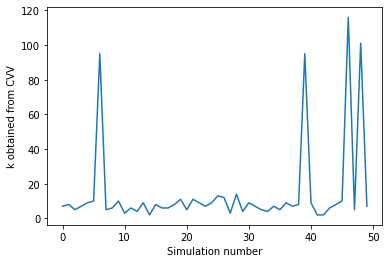

In [287]:
p1 = plt.plot(range(0,50),best_ks)
plt.ylabel('k obtained from CVV')
plt.xlabel('Simulation number')
plt.show()



**Mean and standard deviation of k:**

In [284]:
print('Mean:', np.mean(best_ks))
print('Standard deviation:', np.std(best_ks))


Mean: 14.68
Standard deviation: 25.93101617754306


**Bar plot of error rates for each of the three methods:**

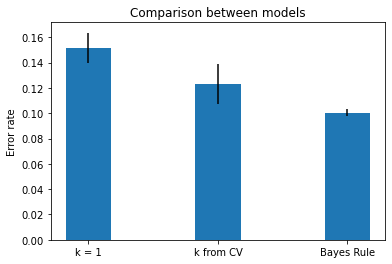

In [285]:
means = [mean_k1, mean_kbest, mean_bayes]
stds = [std_k1, std_kbest, std_bayes]
ind = [1, 2, 3]
    

p2 = plt.bar(ind, means, width, yerr=stds)
plt.ylabel('Error rate')
plt.title('Comparison between models')
plt.xticks(ind, ('k = 1', 'k from CV', 'Bayes Rule'))
plt.show()

**Plot of the error rates for each of the three methods for the 50 datasets:**

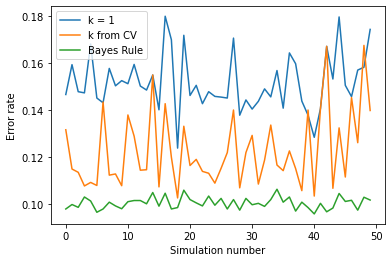

In [288]:
plt.plot(range(0,50), error_k_1, label = 'k = 1')
plt.plot(range(0,50), error_k_optimal, label = 'k from CV')
plt.plot(range(0,50),  error_k_BayesRule, label = 'Bayes Rule')
plt.ylabel('Error rate')
plt.xlabel('Simulation number')
plt.legend()
plt.show()
